In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from skimage.io import imread
from skimage.transform import resize
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [24]:
def save_resized_image(src, pklname, include, width=32, height=None):
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1}) images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    for subdir in os.listdir(src):
        if subdir in include:
            if subdir == '.gitkeep':
                continue
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    im = np.asarray(im).flatten()
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [25]:
cate = {
    1:'Cấm ngược chiều',
    2:'Cấm dừng và đỗ',
    3:'Cấm rẽ',
    4:'Giới hạn tốc độ',
    5:'Cấm còn lại',
    6:'Nguy hiểm',
    7:'Hiệu lệnh'
}
train_path = 'dataset/GTSRB/train'
test_path = 'dataset/GTSRB/validate'
include = os.listdir(train_path)
save_resized_image(src=train_path, pklname='train', width=32, include=include)
save_resized_image(src=test_path, pklname='test', width=32, include=include)

1
2
3
4
5
6
7
1
2
3
4
5
6
7


In [26]:
from collections import Counter
 
train_data = joblib.load('train_32x32px.pkl')
test_data = joblib.load('test_32x32px.pkl')
 
print('number of samples: ', len(train_data['data']))
print('keys: ', list(train_data.keys()))
print('description: ', train_data['description'])
print('image shape: ', train_data['data'][0].shape)
print('labels:', np.unique(train_data['label']))
 
print(Counter(train_data['label']))
print(Counter(test_data['label']))

number of samples:  2948
keys:  ['description', 'label', 'filename', 'data']
description:  resized (32x32) images in rgb
image shape:  (3072,)
labels: ['1' '2' '3' '4' '5' '6' '7']
Counter({'5': 500, '6': 498, '1': 439, '2': 425, '4': 419, '7': 378, '3': 289})
Counter({'6': 55, '5': 53, '1': 49, '2': 47, '4': 47, '7': 42, '3': 32})


In [28]:
X_train = np.array(train_data['data'])
y_train = np.array(train_data['label'])
X_test = np.array(test_data['data'])
y_test = np.array(test_data['label'])


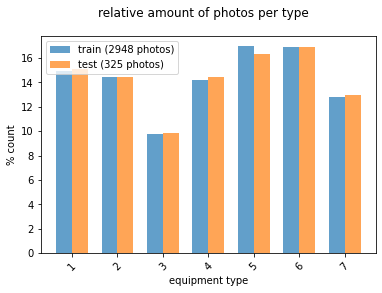

In [29]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
])

In [30]:
print(X_train.shape)

(2948, 3072)


Print results for test data points:
Accuracy : 87.38461538461539%
F1-Scores : 86.4514173338449%


c:\Users\Quang\.conda\envs\kdl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


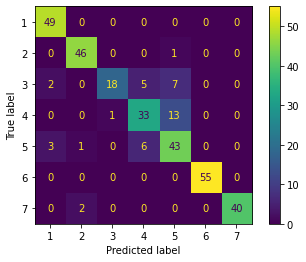

In [31]:
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for test data points:")
# print("Predicted labels: ", y_pred)
# print("Ground truth    : ", y_test)
print(f"Accuracy : {100*accuracy_score(y_test, y_pred)}%")
print(f"F1-Scores : {100*f1_score(y_test, y_pred, average='macro')}%")
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [32]:
import warnings
warnings.filterwarnings('ignore')
acc_all = []
stt = []
max_acc = 0
max_stt = 0
for i in range(1,100):
    clf = MLPClassifier(hidden_layer_sizes=[16,32], activation='relu', solver='adam', batch_size=64, random_state=1, max_iter=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu = 100*accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accu}% at {i} epochs")
    stt.append(i)
    acc_all.append(accu)
    if accu > max_acc:
        max_acc = accu
        max_stt = i
print(max_stt, max_acc)

Accuracy : 55.38461538461539% at 1 epochs
Accuracy : 75.07692307692308% at 2 epochs
Accuracy : 79.07692307692308% at 3 epochs
Accuracy : 81.53846153846153% at 4 epochs
Accuracy : 81.53846153846153% at 5 epochs
Accuracy : 84.61538461538461% at 6 epochs
Accuracy : 80.92307692307692% at 7 epochs
Accuracy : 84.3076923076923% at 8 epochs
Accuracy : 87.07692307692308% at 9 epochs
Accuracy : 88.3076923076923% at 10 epochs
Accuracy : 88.61538461538461% at 11 epochs
Accuracy : 87.6923076923077% at 12 epochs
Accuracy : 89.23076923076924% at 13 epochs
Accuracy : 89.53846153846153% at 14 epochs
Accuracy : 90.46153846153845% at 15 epochs
Accuracy : 90.76923076923077% at 16 epochs
Accuracy : 90.15384615384615% at 17 epochs
Accuracy : 89.53846153846153% at 18 epochs
Accuracy : 90.76923076923077% at 19 epochs
Accuracy : 92.3076923076923% at 20 epochs
Accuracy : 92.3076923076923% at 21 epochs
Accuracy : 92.3076923076923% at 22 epochs
Accuracy : 91.07692307692308% at 23 epochs
Accuracy : 91.384615384615

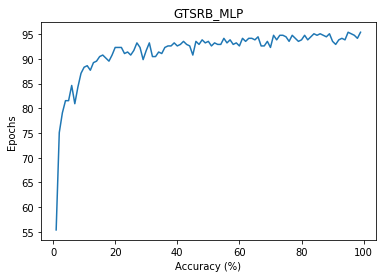

In [33]:
plt.plot(stt, acc_all)
plt.xlabel('Accuracy (%)')
plt.ylabel('Epochs')
  
# giving a title to my graph
plt.title('GTSRB_MLP')
  
# function to show the plot
plt.show()

In [34]:
clf = MLPClassifier(hidden_layer_sizes=[16,32], activation='relu', solver='adam', batch_size=64, random_state=1, max_iter=95)
clf.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=[16, 32], max_iter=95,
              random_state=1)

Print results for 20 test data points:
Accuracy: 95.38461538461539%
F1-Scores: 95.28863509081263%


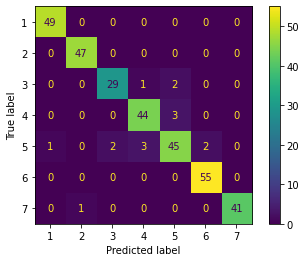

In [35]:
y_pred = clf.predict(X_test)

print("Print results for 20 test data points:")
# print("Predicted labels: ", y_pred)
# print("Ground truth    : ", y_test)
print(f"Accuracy: {100*accuracy_score(y_test, y_pred)}%")
print(f"F1-Scores: {100*f1_score(y_test, y_pred, average='macro')}%")
plot_confusion_matrix(clf, X_test, y_test)
plt.show()